In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import shutil

# Create the .kaggle folder in your home directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Copy kaggle.json into that folder
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Optional: set file permissions (works only on Unix, ignored on Windows)
try:
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
except PermissionError:
    pass

## Importing Face Mask Dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

with zipfile.ZipFile("face-mask-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("face_mask_dataset")
    print('The Dataset is Extracted')

The Dataset is Extracted


## Importing the Dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir(r'C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [7]:
without_mask_files = os.listdir(r'C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [8]:
print('Number of with mask images: ',len(with_mask_files))
print('Number of without mask images: ',len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


## Creating Labels for the two class of Images
## with mask--> 1
## without mask --> 0

In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Displaying the Images

In [13]:
# displaying with mask images
import os

with_mask_dir = r"C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\with_mask"
files = os.listdir(with_mask_dir)

print("Total images:", len(files))
print("First 5 files:", files[:5])
print("Last 5 files:", files[-5:])


Total images: 3725
First 5 files: ['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
Last 5 files: ['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


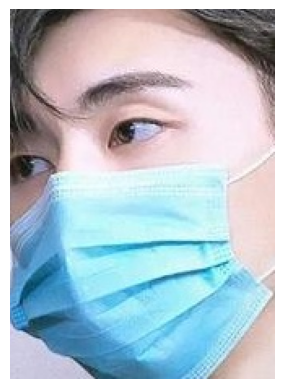

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the 'with_mask' folder
with_mask_dir = r"C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\with_mask"

# Your image filename
image_name = "with_mask_1545.jpg"  # Change this to any image name in your folder

# Full path to the image
img_path = os.path.join(with_mask_dir, image_name)

# Check if file exists
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"Image '{image_name}' not found in {with_mask_dir}")


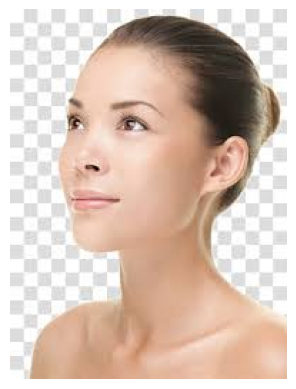

In [15]:
# displaying without mask image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the 'with_mask' folder
with_mask_dir = r"C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\without_mask"

# Your image filename
image_name = "without_mask_2925.jpg"  # Change this to any image name in your folder

# Full path to the image
img_path = os.path.join(with_mask_dir, image_name)

# Check if file exists
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"Image '{image_name}' not found in {with_mask_dir}")


## Image Processing
1. Resize the Images
2. Convert the images to numpy arrays

In [16]:
import os
import numpy as np
from PIL import Image

with_mask_path = r"C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\with_mask"
without_mask_path = r"C:\Users\MOHAMMED HAMZAH\DEEP-LEARNING\DEEP_LEARNING PROJECTS\DL_Project 5\face_mask_dataset\data\without_mask"

data = []

# Process WITH MASK images
for img_file in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

# Process WITHOUT MASK images
for img_file in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

print(f"Total images loaded: {len(data)}")

C:\Users\MOHAMMED HAMZAH\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Total images loaded: 7553


In [37]:
len(data)

7553

In [38]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [39]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape

(128, 128, 3)

In [41]:
# converting image list and label list to numpy arrrays

X = np.array(data)
Y = np.array(labels)

In [42]:
type(X)

numpy.ndarray

In [43]:
type(Y)

numpy.ndarray

In [44]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [45]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [48]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [49]:
X_train[0]

array([[[ 43,  16,  12],
        [ 45,  17,  12],
        [ 47,  20,  13],
        ...,
        [ 45,  29,  32],
        [ 44,  29,  32],
        [ 44,  29,  32]],

       [[ 47,  17,  13],
        [ 50,  19,  15],
        [ 56,  25,  20],
        ...,
        [ 45,  30,  33],
        [ 44,  29,  32],
        [ 44,  29,  32]],

       [[ 55,  22,  16],
        [ 60,  26,  20],
        [ 70,  36,  30],
        ...,
        [ 44,  29,  32],
        [ 43,  28,  31],
        [ 43,  28,  31]],

       ...,

       [[134, 188, 169],
        [131, 187, 166],
        [124, 184, 162],
        ...,
        [178, 120, 112],
        [179, 122, 114],
        [180, 123, 115]],

       [[147, 192, 174],
        [144, 192, 172],
        [139, 191, 170],
        ...,
        [176, 119, 109],
        [178, 121, 111],
        [178, 121, 111]],

       [[156, 197, 178],
        [153, 197, 177],
        [148, 196, 175],
        ...,
        [174, 117, 106],
        [175, 118, 107],
        [175, 118, 107]]

## Building a Convolutional Neural Networks (CNN)

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

# Explicit input layer
model.add(keras.Input(shape=(128,128,3)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [52]:
# Compile the Neural Network
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [59]:
# training the neural network
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - acc: 0.9471 - loss: 0.1377 - val_acc: 0.9421 - val_loss: 0.1601
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - acc: 0.9646 - loss: 0.1072 - val_acc: 0.9339 - val_loss: 0.1777
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 35s 205ms/step - acc: 0.9619 - loss: 0.1013 - val_acc: 0.9537 - val_loss: 0.1599
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 183ms/step - acc: 0.9677 - loss: 0.0951 - val_acc: 0.9388 - val_loss: 0.2149
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 182ms/step - acc: 0.9781 - loss: 0.0632 - val_acc: 0.9405 - val_loss: 0.2474


In [60]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("Test Accuracy = ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - acc: 0.9403 - loss: 0.2821
Test Accuracy =  0.9437458515167236


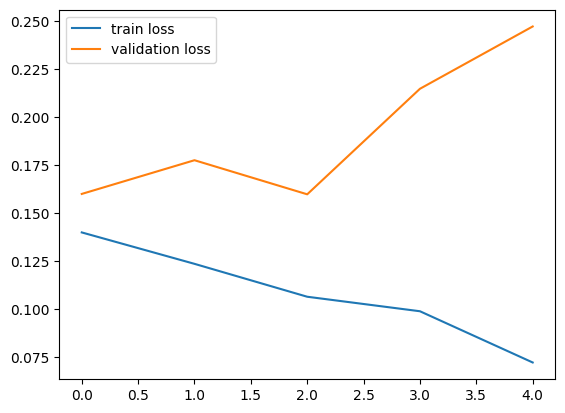

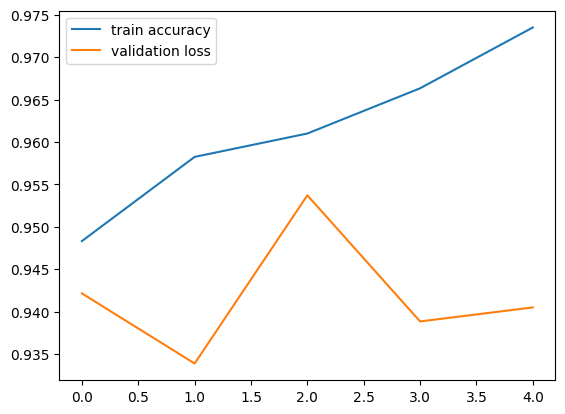

In [61]:
h = history 

# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation loss')
plt.legend()
plt.show()

## Predictive System

Path of the image to be predicted:  women.jpg


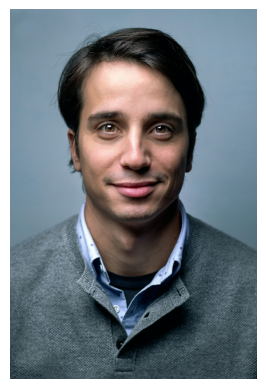

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.05580033 0.8992947 ]]
1
The Person in the Image is wearing a mask


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get image path
input_image_path = input("Path of the image to be predicted: ")

# Read image
input_image = cv2.imread(input_image_path)

# Show image in Jupyter
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Resize and scale
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_scaled = np.expand_dims(input_image_scaled, axis=0)

# Prediction
input_prediction = model.predict(input_image_scaled)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The Person in the Image is wearing a mask')
else:
    print('The Person in the Image is not wearing a mask')
